# Getting Started
In this notebook you will learn how to run your first simulation with fuse.


## Imports

In [1]:
import sys

sys.path.insert(0, "/home/digangi/cutax/")  # on midway3

import fuse
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from tqdm import tqdm
import tqdm.notebook as tq
import pandas as pd
from sklearn.cluster import DBSCAN

You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


/home/digangi/cutax/cutax/cut_lists/science.py:28: UserWarning: Removing cut <class 'cutax.cuts.s2_width.S2Width'>
  warnings.warn(f"Removing cut {cut}", UserWarning)
/home/digangi/.local/lib/python3.9/site-packages/straxen/config/preprocessors.py:16: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


In [2]:
st = fuse.context.full_chain_context(output_folder="./fuse_data")
st.set_config(
    {
        "path": "/project2/lgrandi/layos/",
        "file_name": "output_n_Veto_neutron_AmBe_1.root",
        "entry_stop": 2000,
        "nv_output": True,  # On inclus les pmts du Neutron Veto (par defaut False)
        "debug": True,
        "file_size_limit": 500 / 1e4,  # Poser question a Hening sur cela....
    }
)

run_number = "00003"  # Attention à ce parametre, aujourd'hui triviale, mais qui tiens en compte du mapping pour la TPC en fonction du run.

Warning! elife not in context config, skipping...
Warning! electron_drift_velocity not in context config, skipping...
Warning! electron_drift_time_gate not in context config, skipping...


/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of mult

In [2]:
g4dir = "/project/lgrandi/xenonnt/simulations/nveto/ambe/geant4/ambe_nveto_gd0p02_2024-01-23/gd_ambe_sr1_top_cw7d8m_with_gamma/results/"
filename = "nT_mc_gdt7p8m_wc_00000.root"

st = fuse.context.full_chain_context(output_folder="./fuse_data")
st.set_config(
    {
        "path": g4dir,
        "file_name": filename,
        "entry_stop": 2000,
        "nv_output": True,  # On inclus les pmts du Neutron Veto (par defaut False)
        "debug": True,
        "file_size_limit": 500 / 1e4,  # Poser question a Hening sur cela....
    }
)

run_number = "00003"  # Attention à ce parametre, aujourd'hui triviale, mais qui tiens en compte du mapping pour la TPC en fonction du run.

Warning! elife not in context config, skipping...
Warning! electron_drift_velocity not in context config, skipping...
Warning! electron_drift_time_gate not in context config, skipping...


/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/home/digangi/.local/lib/python3.9/site-packages/strax/context.py:380: UserWarning: Provides of mult

In [3]:
st.set_config({"deteministic_seed": False, "user_defined_random_seed": 42})

In [4]:
nv_pmthits = st.get_array(run_number, "nv_pmthits")

Loading nv_pmthits: |          | 0.00 % [00:00<?]

In [5]:
len(np.unique(nv_pmthits["evtid"]))

391

In [6]:
len(nv_pmthits)

179349

In [7]:
# sr=1
# eCE=0.87

sr = 0
eCE = 0.75

nv_hitlet = fuse.neutron_veto.NeutronVetoHitlets(sr=sr)

hitlets_nv = nv_hitlet.compute(nv_pmthits, eCE=eCE)

Applying QE and CE
Loading hit survive
Sampling hitlets charge pe
Getting time hitlets


In [8]:
hitlets_nv_stacked = nv_hitlet.compute(nv_pmthits, eCE=eCE, Stacked_opt="yes")

Applying QE and CE
Loading hit survive
Sampling hitlets charge pe
Getting time hitlets
Looking for stacked hitlets


  0%|          | 0/373 [00:00<?, ?it/s]

In [9]:
len(hitlets_nv)

28543

In [10]:
# Hitlets_nv is an array to be computed by strax plugin, exemple
import cutax

st = cutax.contexts.xenonnt_online()
strax_nv = st.get_single_plugin("0", "events_nv")
events_nv = strax_nv.compute(hitlets_nv, min(hitlets_nv["time"]), max(hitlets_nv["time"]))
events_nv_stacket = strax_nv.compute(
    hitlets_nv_stacked, min(hitlets_nv_stacked["time"]), max(hitlets_nv_stacked["time"])
)

You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


In [11]:
len(events_nv)

550

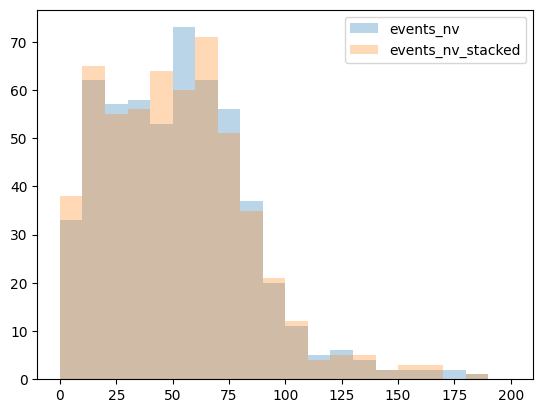

In [13]:
plt.hist(events_nv["area"], range=[0, 200], bins=20, alpha=0.3, label="events_nv")
plt.hist(events_nv_stacket["area"], range=[0, 200], bins=20, alpha=0.3, label="events_nv_stacked")
plt.legend()
plt.show()

In [44]:
output_file = (
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/"
    + "fuseHitSim_sr"
    + str(sr)
    + "config_seed42_nparray"
    + filename
)
np.save(output_file, events_nv)
print("Output saved to file: ", output_file)

Output saved to file:  /scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr0config_seed42_nparraynT_mc_gdt7p8m_wc_00000.root


In [12]:
nv_pmthits

array([(4.1504655, 3.7096519e+01, 2006,   0,      776003102,      776003102),
       (7.0233135, 1.2525828e+05,  123,   0,      776128323,      776128323),
       (7.020823 , 1.2526002e+05,  300,   0,      776128325,      776128325),
       ...,
       (4.4297585, 1.4902604e+13, 2111, 370, 15282534046465, 15282534046465),
       (2.2376018, 1.4902604e+13, 2035, 370, 15282534046465, 15282534046465),
       (3.5634096, 1.4902604e+13, 2103, 370, 15282534046465, 15282534046465)],
      dtype=[('pmthitEnergy', '<f4'), ('pmthitTime', '<f4'), ('pmthitID', '<i2'), ('evtid', '<i4'), (('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8')])

In [13]:
ak_pmthits = ak.Array(nv_pmthits)
ak_pmthits

<Array [{pmthitEnergy: 4.15, ...}, ..., {...}] type='179349 * {pmthitEnergy...'>

In [19]:
# awkward array with 'evtid', 'pmthitTime', 'pmthitEnergy', 'pmthitID'
# pmthits=ak.Array(nv_pmthits)
pmthits = nv_pmthits
print(len(pmthits))
# select NV PMTs (need to exclude MV PMTs?)
mask = pmthits["pmthitID"] >= 2000
pmthits = pmthits[mask]
print(len(pmthits))

179349
177403


In [10]:
hitlets_nv_stacked = nv_hitlet.compute(nv_pmthits, Stacked_opt="yes")

Applying QE and CE
Loading hit survive
Sampling hitlets charge pe
Getting time hitlets
Looking for stacket hitlets


  0%|          | 0/1824 [00:00<?, ?it/s]

In [17]:
len(events_nv)

553

In [196]:
### SR0 config
events_AM = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/AMhitsim_nVETOEvents_gd_ambe_sr1_top_cw7d8m_with_gamma_ce0.75.npy"
)
events_NV_0 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00000.root.npy"
)
events_NV_1 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00001.root.npy"
)
events_NV_2 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00002.root.npy"
)
events_NV_3 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00003.root.npy"
)
events_NV_4 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00004.root.npy"
)
events_NV_5 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00005.root.npy"
)
events_NV_6 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00006.root.npy"
)
events_NV_7 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00007.root.npy"
)

events_NV_0_nparray = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_nT_mc_gdt7p8m_wc_00007.root.npy"
)

In [91]:
### SR1 config
events_AM = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/AMhitsim_nVETOEvents_gd_ambe_sr1_top_cw7d8m_with_gamma_ce0.87.npy"
)
events_NV_0 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00000.root.npy"
)
events_NV_1 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00001.root.npy"
)
events_NV_2 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00002.root.npy"
)
events_NV_3 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00003.root.npy"
)
events_NV_4 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00004.root.npy"
)
events_NV_5 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00005.root.npy"
)
events_NV_6 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00006.root.npy"
)
events_NV_7 = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr1config_nT_mc_gdt7p8m_wc_00007.root.npy"
)

In [92]:
events_NV = np.concatenate(
    [
        events_NV_0,
        events_NV_1,
        events_NV_2,
        events_NV_3,
        events_NV_4,
        events_NV_5,
        events_NV_6,
        events_NV_7,
    ]
)
# events_NV = np.concatenate([events_NV_7])

len(events_NV)

4455

In [93]:
len(events_AM)

4403

In [45]:
events_AM = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/AMhitsim_nVETOEvents_gd_ambe_sr1_top_cw7d8m_with_gamma_ce0.75_.npy"
)
events_NV = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr0config_seed42_nT_mc_gdt7p8m_wc_00000.root.npy"
)
events_NV_nparray = np.load(
    "/scratch/midway3/digangi/simulations/NeutronVeto/hitlet_sim/output_data/fuseHitSim_sr0config_seed42_nparraynT_mc_gdt7p8m_wc_00000.root.npy"
)

[AM HitSim] NV events generated: 552
[fuse HitSim] NV events generated: 553
[fuse HitSim] NV events generated: 557
fuse - AM: 0.18083182640144665 %


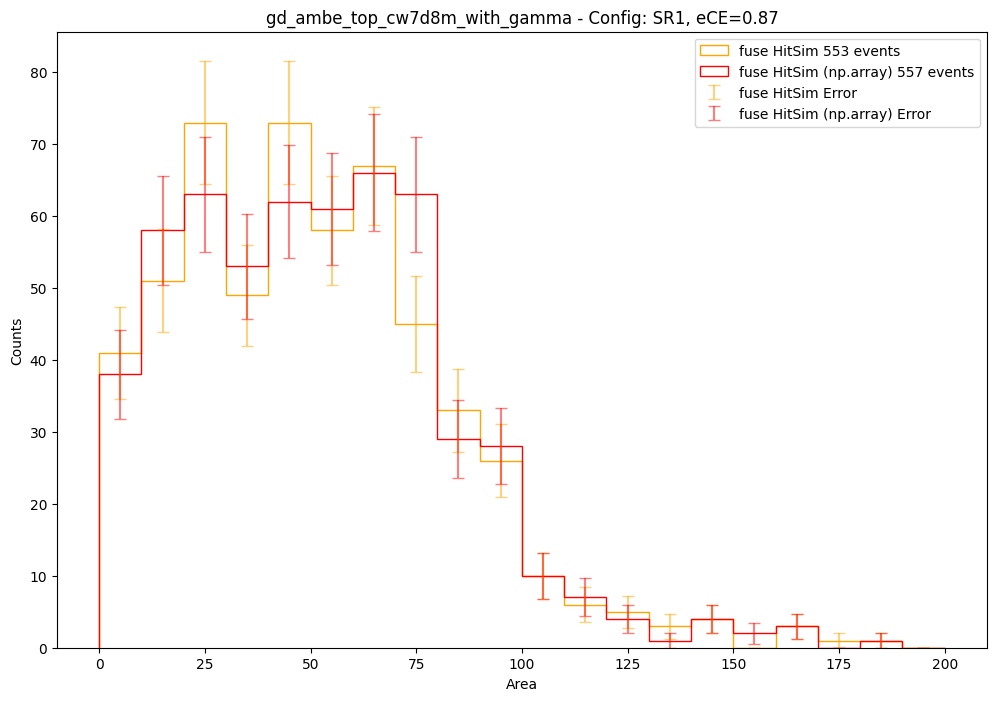

In [46]:
# Stampa del numero di eventi
print("[AM HitSim] NV events generated:", len(events_AM))
print("[fuse HitSim] NV events generated:", len(events_NV))
print("[fuse HitSim] NV events generated:", len(events_NV_nparray))

print("fuse - AM:", (len(events_NV) - len(events_AM)) / len(events_NV) * 100, "%")

plt.figure(figsize=(12, 8))

# Parametri comuni per l'istogramma
bin_range = [0, 200]
bins = 20

# Istogramma per AM HitSim
# counts_AM, edges_AM, _ = plt.hist(events_AM['area'], histtype='step', range=bin_range, bins=bins, label='AM HitSim: ' + str(len(events_AM)) + ' events', color='b')
# bin_centers_AM = (edges_AM[:-1] + edges_AM[1:]) / 2
# errors_AM = np.sqrt(counts_AM)

# Istogramma per fuse HitSim
counts_nv, edges_nv, _ = plt.hist(
    events_NV["area"],
    histtype="step",
    range=bin_range,
    bins=bins,
    label="fuse HitSim " + str(len(events_NV)) + " events",
    color="orange",
)
bin_centers_nv = (edges_nv[:-1] + edges_nv[1:]) / 2
errors_nv = np.sqrt(counts_nv)

# Istogramma per fuse HitSim
counts_nv_, edges_nv_, _ = plt.hist(
    events_NV_nparray["area"],
    histtype="step",
    range=bin_range,
    bins=bins,
    label="fuse HitSim (np.array) " + str(len(events_NV_nparray)) + " events",
    color="r",
)
bin_centers_nv_ = (edges_nv_[:-1] + edges_nv_[1:]) / 2
errors_nv_ = np.sqrt(counts_nv_)


# Aggiunta delle barre d'errore con tacchette orizzontali
# plt.errorbar(bin_centers_AM, counts_AM, yerr=errors_AM, fmt='none', color='b',
#             label='AM HitSim Error', capsize=4, capthick=1, alpha=0.5)
plt.errorbar(
    bin_centers_nv,
    counts_nv,
    yerr=errors_nv,
    fmt="none",
    color="orange",
    label="fuse HitSim Error",
    capsize=4,
    capthick=1,
    alpha=0.5,
)
plt.errorbar(
    bin_centers_nv_,
    counts_nv_,
    yerr=errors_nv_,
    fmt="none",
    color="r",
    label="fuse HitSim (np.array) Error",
    capsize=4,
    capthick=1,
    alpha=0.5,
)


# Personalizzazione del grafico
plt.xlabel("Area")
plt.ylabel("Counts")
plt.title("gd_ambe_top_cw7d8m_with_gamma - Config: SR1, eCE=0.87")
plt.legend()
plt.show()